In [0]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
def create_dataset():
  n_pts = 500
  X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
  x_data = torch.Tensor(X)
  y_data = torch.Tensor(y.reshape((500, 1)))
  return X, y, x_data, y_data

X, y, x_data, y_data = create_dataset()

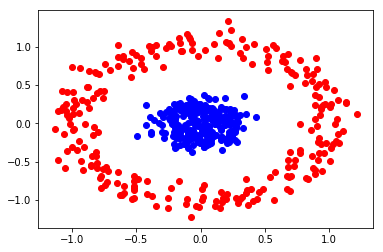

In [13]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1], c="r")
  plt.scatter(X[y==1, 0], X[y==1, 1], c="b")
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear1 = nn.Linear(in_features=input_size, out_features=H1)
    self.linear2 = nn.Linear(in_features=H1, out_features=output_size)
    
  def forward(self, X):
    x = torch.sigmoid(self.linear1(X)) # 二値分類
    x = torch.sigmoid(self.linear2(x))
    return x
  
  def predict(self, X):
    pred = self.forward(X)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [15]:
torch.manual_seed(2)
model = Model(input_size=2, H1=4, output_size=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
def get_param():
  [w, b] = model.parameters()
  w1, w2 = w.view(2)
  b1 = b[0]
  return w1.item(), w2.item(), b1.item() #item -> scaler

In [0]:
# 損失関数
criterion = nn.BCELoss()

# 最適化(paramterを指す)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1) 

In [18]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data) #損失関数の計算
  print("epoch: ", i, "loss: ", loss.item())
  
  losses.append(loss.item())
  
  # 最適化
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  
  

epoch:  0 loss:  0.7148522138595581
epoch:  1 loss:  0.6947312355041504
epoch:  2 loss:  0.6955161094665527
epoch:  3 loss:  0.7014897465705872
epoch:  4 loss:  0.7013992667198181
epoch:  5 loss:  0.697472095489502
epoch:  6 loss:  0.6939275860786438
epoch:  7 loss:  0.6928625106811523
epoch:  8 loss:  0.693941593170166
epoch:  9 loss:  0.6954426765441895
epoch:  10 loss:  0.6958808302879333
epoch:  11 loss:  0.6949241757392883
epoch:  12 loss:  0.693157970905304
epoch:  13 loss:  0.6914014220237732
epoch:  14 loss:  0.6901755332946777
epoch:  15 loss:  0.6894775629043579
epoch:  16 loss:  0.6888664364814758
epoch:  17 loss:  0.6877952814102173
epoch:  18 loss:  0.6859349012374878
epoch:  19 loss:  0.6832882165908813
epoch:  20 loss:  0.6800878047943115
epoch:  21 loss:  0.6766111850738525
epoch:  22 loss:  0.6730255484580994
epoch:  23 loss:  0.6693330407142639
epoch:  24 loss:  0.6653968095779419
epoch:  25 loss:  0.661038875579834
epoch:  26 loss:  0.6561349034309387
epoch:  27 loss

Text(0.5, 0, 'epoch')

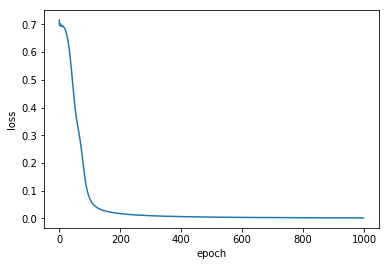

In [19]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 3)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 3)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) # into 1 dimension (flatten)
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

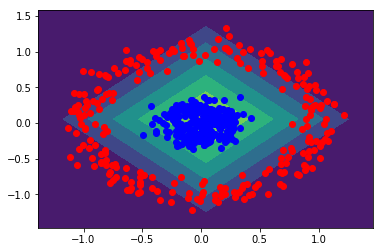

In [49]:
plot_decision_boundary(X, y)
scatter_plot()